In [33]:
#import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# clean data 

#missing values

def missing_values(df):
    missing_vals = df.isnull().sum()
    
    return missing_vals



In [17]:
def check_data(df):
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns] 
    
    df_check = pd.DataFrame(summary, columns = ['column', 'dtype', 'instances', 'unique', 'missing_vals', 'duplicates'])
    
    return df_check 

In [60]:
#function to change date columns to datetime 

def convert_to_datetime(df, column_name):
    try: 
        df[column_name] = pd.to_datetime(df[column_name], format = "%Y%m%d")
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None 
    

In [94]:
#function to create bar plot 

def bar_plot(df, x_col):
    sns.countplot(x=x_col, data=df)
    plt.title('Bar Plot')
    
    return plt.show()

In [95]:
#function to create box plot

def box_plot(df, x_col, y_col):
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title('Box Plot')
    
    return plt.show()


In [96]:
# function to create density plot (a kernel density estimation (KDE) plot provides info. on the likelihood of observing data points at different values along the x-axis)

def density_plot(df, x_col):
    data = df
    col_name = x_col
    sns.kdeplot(data[col_name],fill=True)
    plt.title('Density Plot')
    
    return plt.show()

In [97]:
# function to create a histogram with kde

def hist_plot(df, x_col):
    data = df
    col_name = x_col
    sns.histplot(data[col_name], kde=True)
    plt.title('Histogram Plot')
    
    return plt.show()

In [98]:
#function to create a scatter plot 

def scatter_plot(df, x_col, y_col):
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title('Scatter Plot')
    
    return plt.show()

In [99]:
#function to create a line plot 

def line_plot(df, x_col, y_col):
    sns.lineplot(x=x_col, y=y_col, data=df)
    plt.title('Line Plot')
    
    return plt.show()

In [100]:
#function to create a correlation heatmap 

def correlation_heatmap(df):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    return plt.show()

In [117]:
# function to create a subplot (i.e. combining plots)

def sub_plot(df, x_col, y_col):
    
    #plt.figure(figsize=(12,8))
    
    plt.subplot(2, 2, 1)
    box_plot(df, x_col, y_col)
    
    plt.subplot(2, 2, 2)
    bar_plot(df, x_col)
    
    plt.subplot(2, 2, 3)
    hist_plot(df, x_col)
    
    plt.subplot(2, 2, 4)
    scatter_plot(df, x_col, y_col)
    
    plt.tight_layout()
    
    return plt.show()
    

In [150]:
#function for pair plot (used to explore correlations and trends between multiple variables by visualising them in pairs)

def pair_plot(df, column):
    
    sns.pairplot(data=df, hue=column)
    plt.suptitle('Pairplot of numerical values', y=1.02)
    
    return plt.show()

In [155]:
# function to create violin plots - helps to visualise the distribution of a numerical variable acros different categories (combines the features of box plots and kde plots)

def violin_plot(x_col, y_col, df):
    sns.violinplot(x=x_col, y=y_col, data=df)
    plt.title('Violin Plot')
    
    return plt.show()


In [160]:
#plot stats function

def plot_stats(df, column, ax, color, angle):
    count_classes = df[column].value_counts()
    ax=sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

In [23]:
# a function to group data with certain frequency (useful when it's a large dataset with many rows)

def grouped(df, key, freq, col):
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean=(col, 'mean'))
    df_grouped = df_grouped.reset_index()
    
    return df_grouped

In [28]:
# a function to add time column to df to enhance forecasting (linear regression with time series)

def add_time_col(df, key, freq, col):
    df_grouped =  grouped(df, key, freq, col)
    df_grouped['time'] = np.arange(len(df_grouped.index))
    column_time = df_grouped.pop('time')
    df_grouped.insert(1, 'time', column_time)
    
    return df_grouped

In [20]:
#a function to add lag feature (using pandas lib)

def add_lag(df, key, freq, col, lag):
    df_grouped = grouped(df, key, freq, col)
    name = 'Lag_' + str(lag)
    df_grouped['Lag'] = df_grouped['mean'].shift(lag)
    
    return df_grouped


In [165]:
# plot parameters (can be ustilised repeatedly)

plot_params = dict(
color='0.75',
style='-',
markeredgecolor='0.25',
markerfacecolor='0.25',
legend=False
)

In [134]:
data = pd.read_csv(r"C:\Users\Krupa\Documents\Krups Coding\Data Projects\cricket_world_cup_data\wc_data_summary.csv")
data.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Winning Details
0,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,New Zealand won by 9 wickets (with 82 balls re...
1,2023,2nd Match (D/N),Hyderabad,October 06 2023,Pakistan,PAK,NED,286,10,205,10,Pakistan won by 81 runs
2,2023,3rd Match,Dharamsala,October 07 2023,Bangladesh,AFG,BAN,156,10,158,4,Bangladesh won by 6 wickets (with 92 balls rem...
3,2023,4th Match (D/N),Delhi,October 07 2023,South Africa,SA,SL,428,5,326,10,South Africa won by 102 runs
4,2023,5th Match (D/N),Chennai,October 08 2023,India,AUS,IND,199,10,201,4,India won by 6 wickets (with 52 balls remaining)


In [10]:
missing_values(data)

Year                       0
Match Number               0
City                       0
Date                       0
Winner                     0
Team 1                     0
Team 2                     0
Total Score for Team 1     0
Total Wicket for Team 1    0
Total Score for Team 2     0
Total Wicket for Team 2    0
Winning Details            0
dtype: int64

In [19]:
data.describe()

,Year,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2014.832636,263.451883,8.012552,209.656904,6.937238
std,5.725259,78.996256,2.023976,64.704236,3.381896
min,2007.000000,58.000000,1.000000,55.000000,0.000000
25%,2011.000000,209.000000,6.000000,165.000000,4.000000
50%,2015.000000,270.000000,8.000000,210.000000,9.000000
75%,2019.000000,324.500000,10.000000,251.500000,10.000000
max,2023.000000,428.000000,10.000000,383.000000,10.000000


In [18]:
check_data(data)

,column,dtype,instances,unique,missing_vals,duplicates
0,Year,int64,239,5,0,0
1,Match Number,object,239,140,0,0
2,City,object,239,43,0,0
3,Date,object,239,191,0,0
4,Winner,object,239,17,0,0
5,Team 1,object,239,18,0,0
6,Team 2,object,239,18,0,0
7,Total Score for Team 1,int64,239,168,0,0
8,Total Wicket for Team 1,int64,239,10,0,0
9,Total Score for Team 2,int64,239,153,0,0


In [21]:
train_df = pd.read_csv(r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\ML_store_sales\train.csv")
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [61]:
convert_to_datetime(train_df, 'date')

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [27]:
grouped(train_df, 'date', 'W', 'sales')

,date,mean
0,2013-01-06,206.843478
1,2013-01-13,190.285220
2,2013-01-20,189.835452
3,2013-01-27,182.152050
4,2013-02-03,198.564267
...,...,...
237,2017-07-23,460.504663
238,2017-07-30,474.732392
239,2017-08-06,513.884368
240,2017-08-13,431.730145


In [31]:
add_time_col(train_df, 'date', 'W', 'sales')

,date,time,mean
0,2013-01-06,0,206.843478
1,2013-01-13,1,190.285220
2,2013-01-20,2,189.835452
3,2013-01-27,3,182.152050
4,2013-02-03,4,198.564267
...,...,...,...
237,2017-07-23,237,460.504663
238,2017-07-30,238,474.732392
239,2017-08-06,239,513.884368
240,2017-08-13,240,431.730145


In [32]:
#add weekly lag feature to training data 

df_grouped_train_w_lag1 = add_lag(train_df, 'date', 'W', 'sales', 1)
df_grouped_train_w_lag1

,date,mean,Lag
0,2013-01-06,206.843478,NaN
1,2013-01-13,190.285220,206.843478
2,2013-01-20,189.835452,190.285220
3,2013-01-27,182.152050,189.835452
4,2013-02-03,198.564267,182.152050
...,...,...,...
237,2017-07-23,460.504663,460.839781
238,2017-07-30,474.732392,460.504663
239,2017-08-06,513.884368,474.732392
240,2017-08-13,431.730145,513.884368


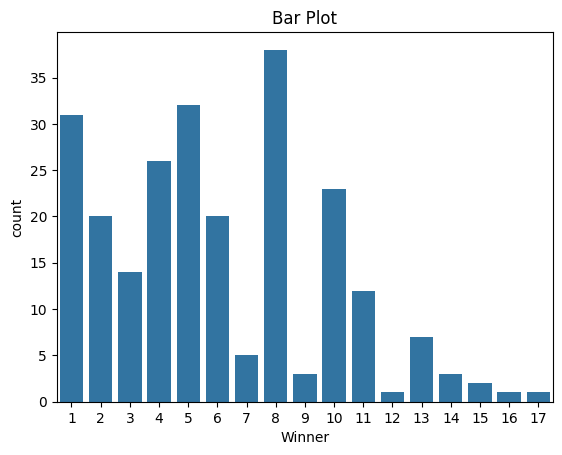

In [102]:
bar_plot(data, 'Winner')

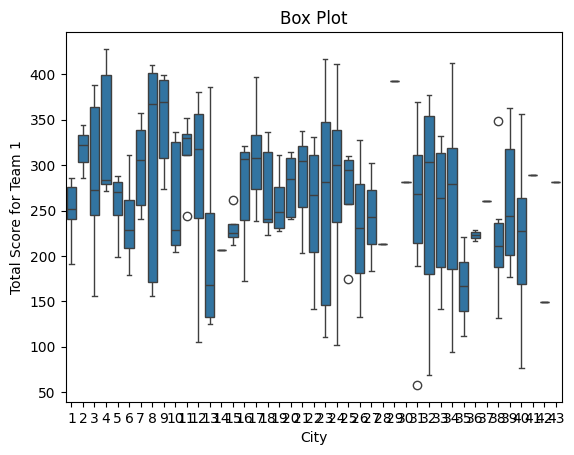

In [103]:
box_plot(data, 'City', 'Total Score for Team 1')

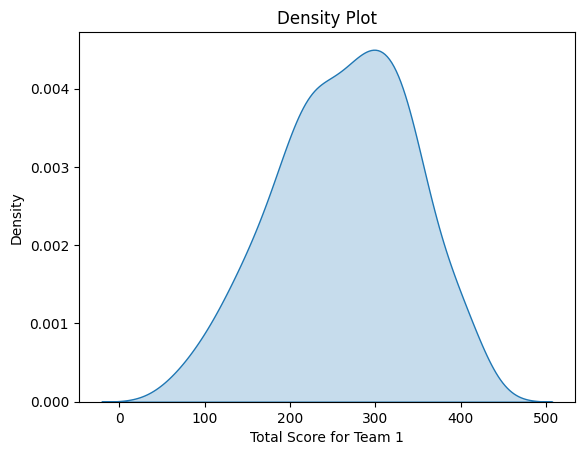

In [104]:
density_plot(data, 'Total Score for Team 1')

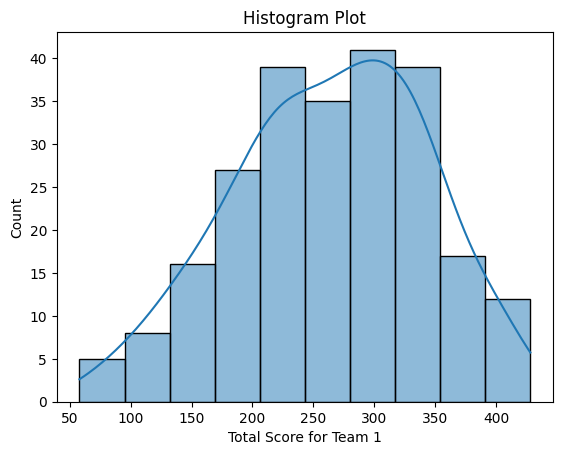

In [105]:
hist_plot(data, 'Total Score for Team 1')

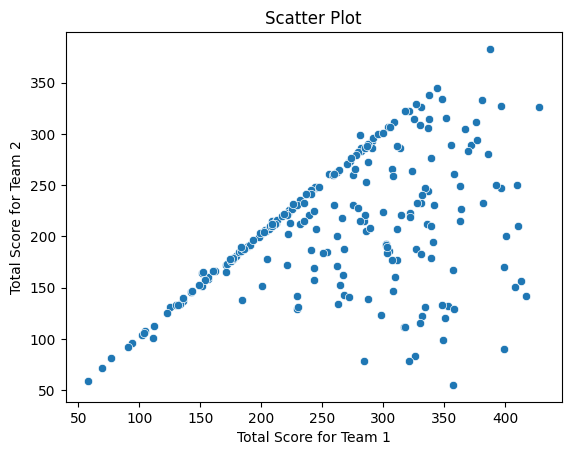

In [106]:
scatter_plot(data, 'Total Score for Team 1', 'Total Score for Team 2')

In [135]:
convert_to_datetime(data, 'Date')

Error: time data "October 05 2023" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


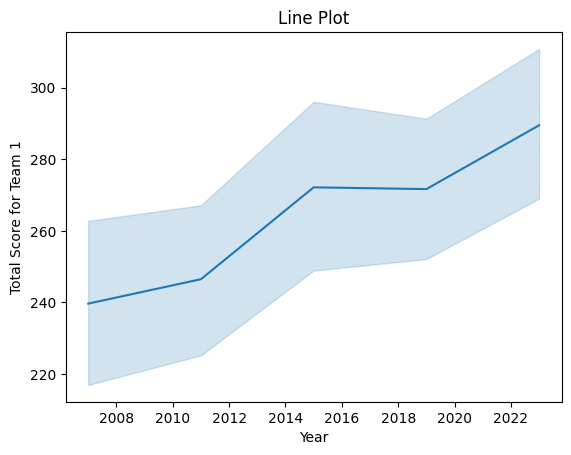

In [107]:
line_plot(data, 'Year', 'Total Score for Team 1' )

In [136]:
data.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Winning Details
0,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,New Zealand won by 9 wickets (with 82 balls re...
1,2023,2nd Match (D/N),Hyderabad,October 06 2023,Pakistan,PAK,NED,286,10,205,10,Pakistan won by 81 runs
2,2023,3rd Match,Dharamsala,October 07 2023,Bangladesh,AFG,BAN,156,10,158,4,Bangladesh won by 6 wickets (with 92 balls rem...
3,2023,4th Match (D/N),Delhi,October 07 2023,South Africa,SA,SL,428,5,326,10,South Africa won by 102 runs
4,2023,5th Match (D/N),Chennai,October 08 2023,India,AUS,IND,199,10,201,4,India won by 6 wickets (with 52 balls remaining)


In [70]:
data['City'].unique()

array([' Ahmedabad', ' Hyderabad', ' Dharamsala', ' Delhi', ' Chennai',
       ' Lucknow', ' Pune', ' Bengaluru', ' Wankhede', ' Eden Gardens',
       ' The Oval', ' Nottingham', ' Cardiff', ' Bristol', ' Southampton',
       ' Taunton', ' Manchester', ' Birmingham', ' Leeds', " Lord's",
       ' Chester-le-Street', ' Pool A', ' Pool A (D/N)', ' Pool B (D/N)',
       ' Pool B', ' Sydney', ' Melbourne', ' Adelaide', ' Wellington',
       ' Auckland', ' Group B (D/N)', ' Group A', ' Group A (D/N)',
       ' Group B', ' Mirpur', ' Colombo (RPS)', ' Mohali', ' Group D',
       ' Group C', ' Super Eights', ' Kingston', ' Gros Islet',
       ' Bridgetown'], dtype=object)

In [137]:
#remove white space from City col 

#iterate over rows in City column to remove whitespace
for index, row in data.iterrows():
    data.at[index, 'City'] = row['City'].strip()
    


In [139]:
#take a copy of data 

data_1 = data.copy()

In [140]:
data_1['City'].unique()

array(['Ahmedabad', 'Hyderabad', 'Dharamsala', 'Delhi', 'Chennai',
       'Lucknow', 'Pune', 'Bengaluru', 'Wankhede', 'Eden Gardens',
       'The Oval', 'Nottingham', 'Cardiff', 'Bristol', 'Southampton',
       'Taunton', 'Manchester', 'Birmingham', 'Leeds', "Lord's",
       'Chester-le-Street', 'Pool A', 'Pool A (D/N)', 'Pool B (D/N)',
       'Pool B', 'Sydney', 'Melbourne', 'Adelaide', 'Wellington',
       'Auckland', 'Group B (D/N)', 'Group A', 'Group A (D/N)', 'Group B',
       'Mirpur', 'Colombo (RPS)', 'Mohali', 'Group D', 'Group C',
       'Super Eights', 'Kingston', 'Gros Islet', 'Bridgetown'],
      dtype=object)

In [143]:
map_dict1 = {'Ahmedabad':1, 'Hyderabad':2, 'Dharamsala':3, 'Delhi':4, 'Chennai':5,
       'Lucknow':6, 'Pune':7, 'Bengaluru':8, 'Wankhede':9, 'Eden Gardens':10,
       'The Oval':11, 'Nottingham':12, 'Cardiff':13, 'Bristol':14, 'Southampton':15,
       'Taunton':16, 'Manchester':17, 'Birmingham':18, 'Leeds':19, "Lord's":20,
       'Chester-le-Street':21, 'Pool A':22, 'Pool A (D/N)':23, 'Pool B (D/N)':24,
       'Pool B':25, 'Sydney':26, 'Melbourne':27, 'Adelaide':28, 'Wellington':29,
       'Auckland':30, 'Group B (D/N)':31, 'Group A':32, 'Group A (D/N)':33, 'Group B':34,
       'Mirpur':35, 'Colombo (RPS)':36, 'Mohali':37, 'Group D':38, 'Group C':39,
       'Super Eights':40, 'Kingston':41, 'Gros Islet':42, 'Bridgetown':43}

In [144]:
data_1['City'] = data_1['City'].map(map_dict1)

In [127]:
data_1.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Winning Details
0,2023,1st Match (D/N),1,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,New Zealand won by 9 wickets (with 82 balls re...
1,2023,2nd Match (D/N),2,October 06 2023,Pakistan,PAK,NED,286,10,205,10,Pakistan won by 81 runs
2,2023,3rd Match,3,October 07 2023,Bangladesh,AFG,BAN,156,10,158,4,Bangladesh won by 6 wickets (with 92 balls rem...
3,2023,4th Match (D/N),4,October 07 2023,South Africa,SA,SL,428,5,326,10,South Africa won by 102 runs
4,2023,5th Match (D/N),5,October 08 2023,India,AUS,IND,199,10,201,4,India won by 6 wickets (with 52 balls remaining)


In [138]:
for index, row in data.iterrows():
    data.at[index, 'Winner'] = row['Winner'].strip()

In [142]:
data_1['Winner'].unique()

array(['New Zealand', 'Pakistan', 'Bangladesh', 'South Africa', 'India',
       'England', 'Afghanistan', 'Australia', 'Netherlands', 'Sri Lanka',
       'West Indies', 'Match tied (England', 'Ireland', 'Zimbabwe',
       'Match tied', 'Canada', 'Kenya'], dtype=object)

In [145]:
map_dict2={'New Zealand':1, 'Pakistan':2, 'Bangladesh':3, 'South Africa':4, 'India':5,
       'England':6, 'Afghanistan':7, 'Australia':8, 'Netherlands':9, 'Sri Lanka':10,
       'West Indies':11, 'Match tied (England':12, 'Ireland':13, 'Zimbabwe':14,
       'Match tied':15, 'Canada':16, 'Kenya':17}

data_1['Winner'] = data_1['Winner'].map(map_dict2)

In [141]:
data['Team 1'].unique()

array(['ENG', 'PAK', 'AFG', 'SA', 'AUS', 'NZ', 'SL', 'BAN', 'NED', 'IND',
       'WI', 'SCOT', 'UAE', 'IRE', 'ZIM', 'KENYA', 'CAN', 'BER'],
      dtype=object)

In [146]:
map_dict3={'ENG':6, 'PAK':2, 'AFG':7, 'SA':4, 'AUS':8, 'NZ':1, 'SL':10, 'BAN':3, 'NED':9, 'IND':5,
       'WI':11, 'SCOT':18, 'UAE':19, 'IRE':13, 'ZIM':14, 'KENYA':17, 'CAN':16, 'BER':20}

data_1['Team 1'] = data_1['Team 1'].map(map_dict3)
data_1['Team 2'] = data_1['Team 2'].map(map_dict3)

In [147]:
data_1.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Winning Details
0,2023,1st Match (D/N),1,October 05 2023,1,6,1,282,9,283,1,New Zealand won by 9 wickets (with 82 balls re...
1,2023,2nd Match (D/N),2,October 06 2023,2,2,9,286,10,205,10,Pakistan won by 81 runs
2,2023,3rd Match,3,October 07 2023,3,7,3,156,10,158,4,Bangladesh won by 6 wickets (with 92 balls rem...
3,2023,4th Match (D/N),4,October 07 2023,4,4,10,428,5,326,10,South Africa won by 102 runs
4,2023,5th Match (D/N),5,October 08 2023,5,8,5,199,10,201,4,India won by 6 wickets (with 52 balls remaining)


In [ ]:
#apply label_encoder to categorical data columns (i.e. city, winer, team1, team2)
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data.City = label.fit_transform(data.City)


In [88]:
corr_df = data.drop(columns=['Match Number', 'Winning Details'])

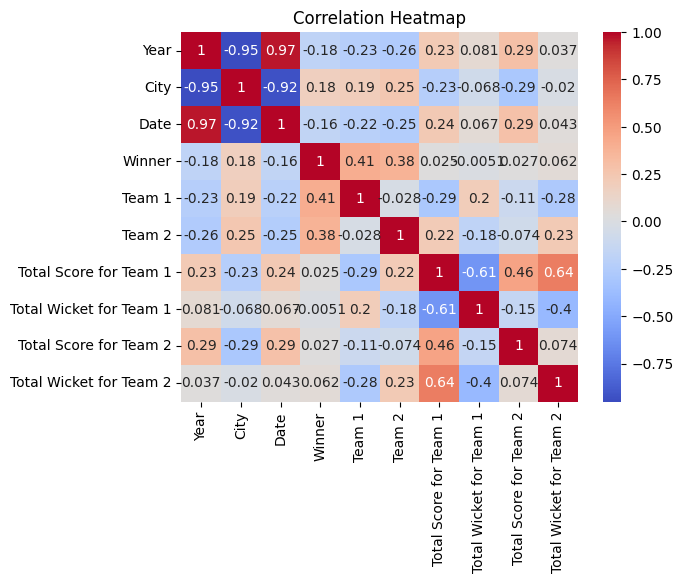

In [108]:
correlation_heatmap(corr_df)

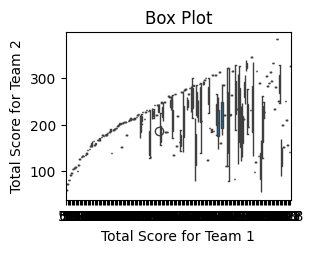

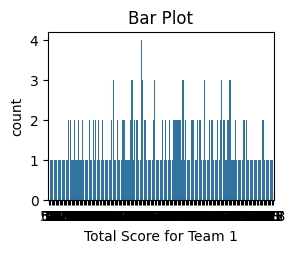

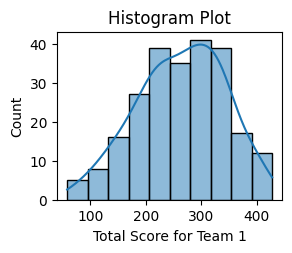

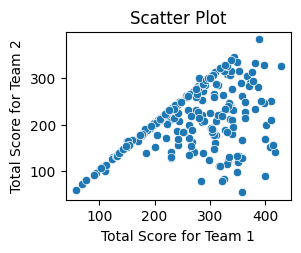

<Figure size 640x480 with 0 Axes>

In [118]:
sub_plot(data, 'Total Score for Team 1', 'Total Score for Team 2')

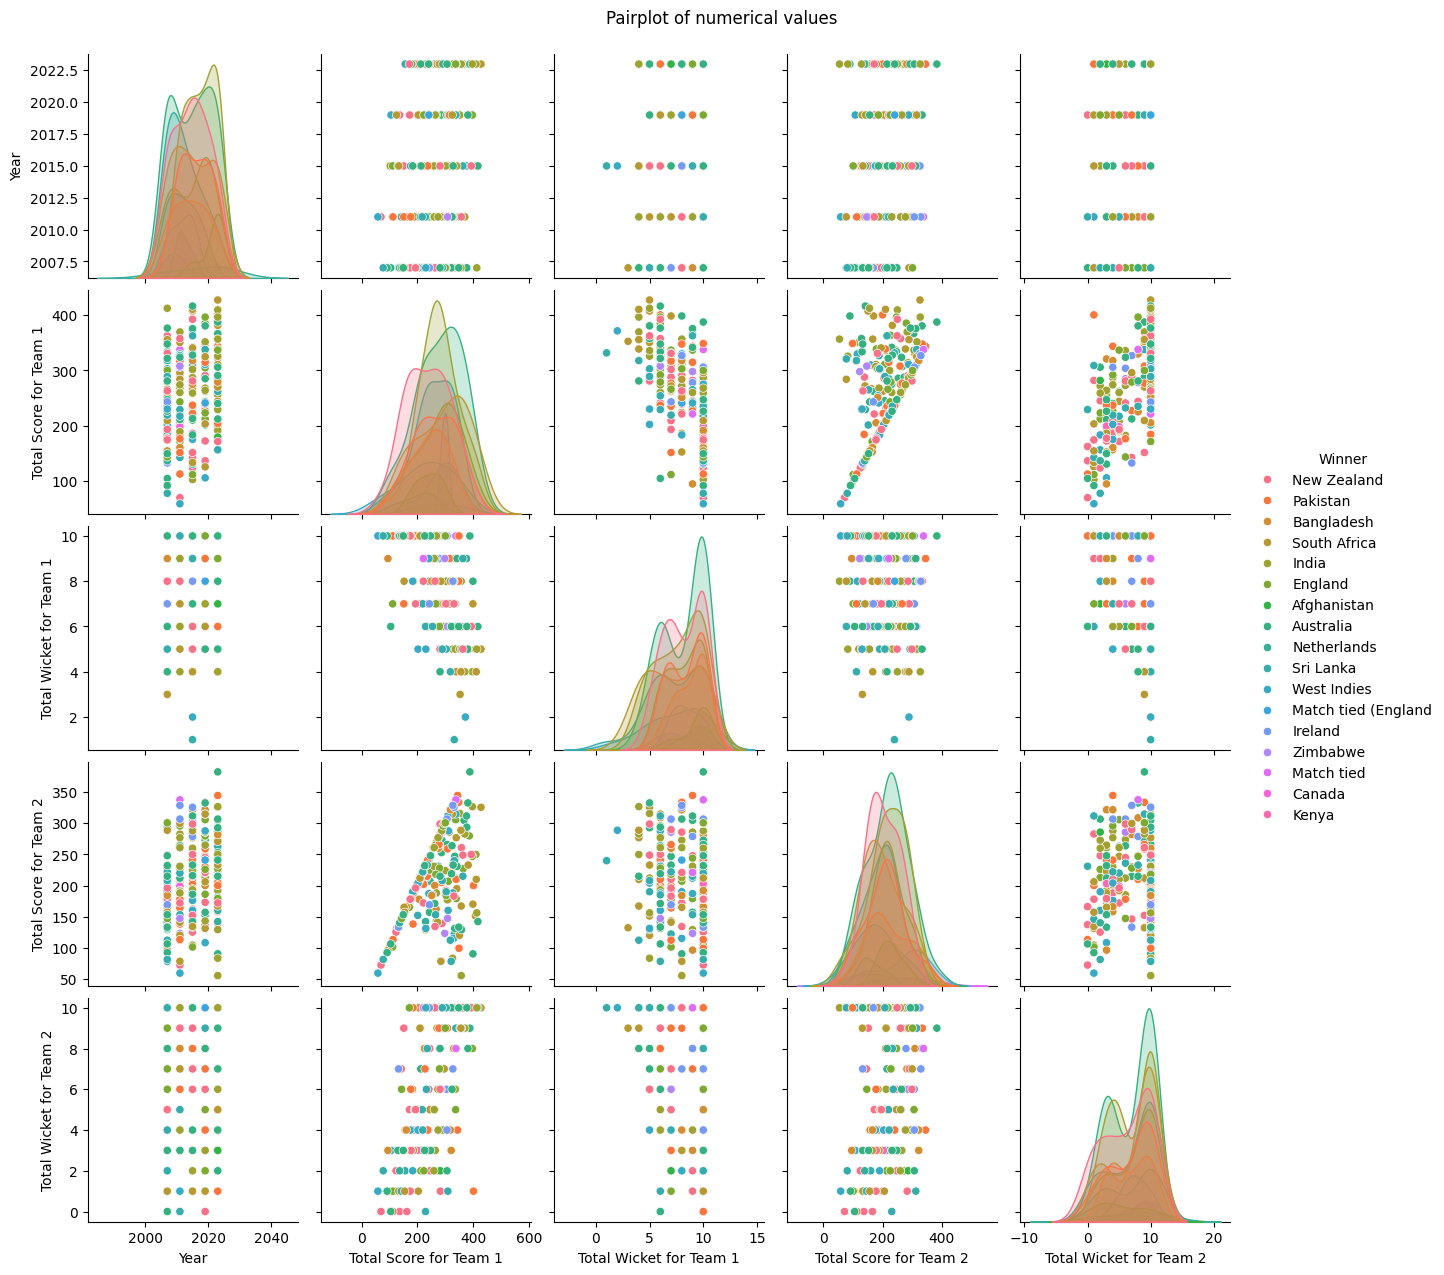

In [151]:
pair_plot(data, 'Winner')

In [154]:
data.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Winning Details
0,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,New Zealand won by 9 wickets (with 82 balls re...
1,2023,2nd Match (D/N),Hyderabad,October 06 2023,Pakistan,PAK,NED,286,10,205,10,Pakistan won by 81 runs
2,2023,3rd Match,Dharamsala,October 07 2023,Bangladesh,AFG,BAN,156,10,158,4,Bangladesh won by 6 wickets (with 92 balls rem...
3,2023,4th Match (D/N),Delhi,October 07 2023,South Africa,SA,SL,428,5,326,10,South Africa won by 102 runs
4,2023,5th Match (D/N),Chennai,October 08 2023,India,AUS,IND,199,10,201,4,India won by 6 wickets (with 52 balls remaining)


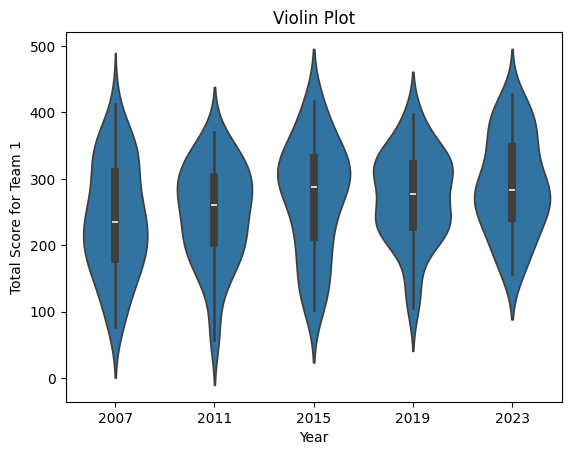

In [158]:
violin_plot('Year', 'Total Score for Team 1', data)

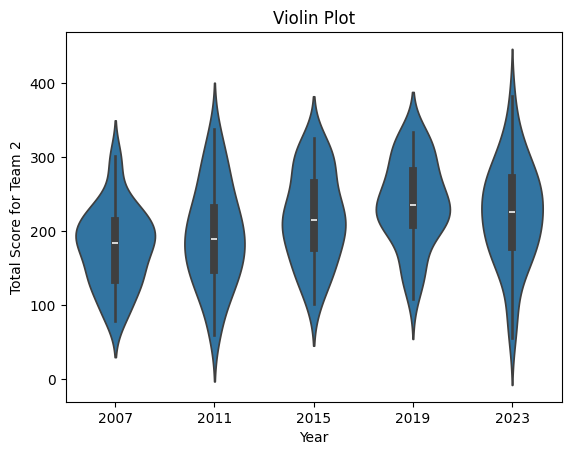

In [159]:
violin_plot('Year', 'Total Score for Team 2', data)

C:\Users\Krupa\AppData\Local\Temp\ipykernel_13320\801830527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
C:\Users\Krupa\AppData\Local\Temp\ipykernel_13320\801830527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)


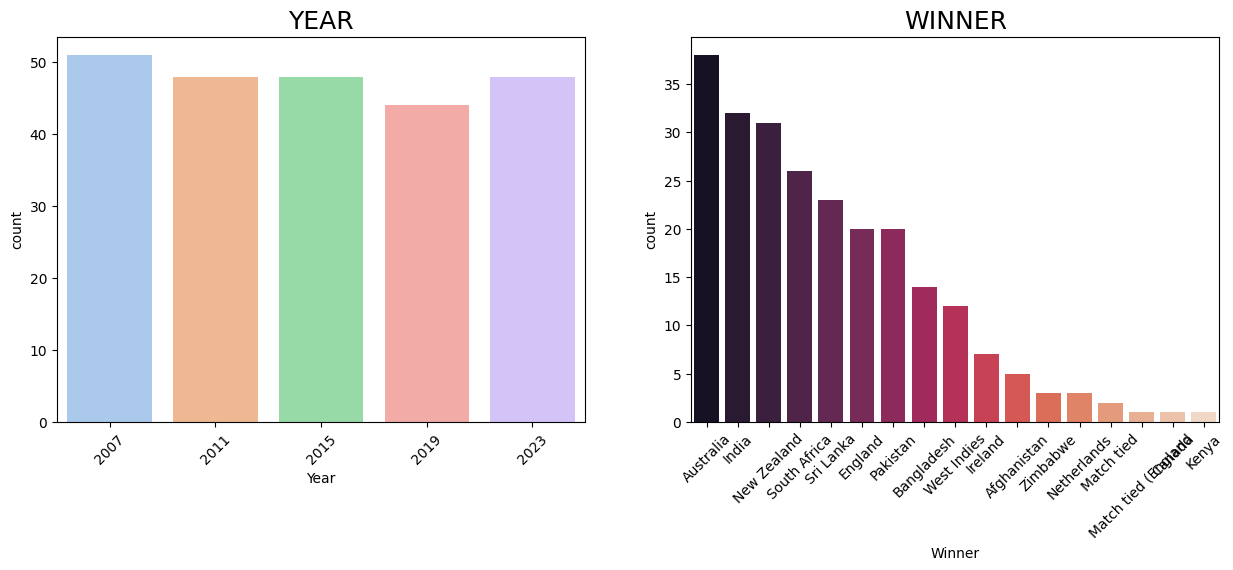

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plot_stats(data, 'Year', axes[0], 'pastel', 45)
plot_stats(data, 'Winner', axes[1], 'rocket', 45)